# Principal component analysis (PCA) или метод главных компонент

Подготовил: Сергей Сабалевский, группа 18Б.07-пу

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

## Теория

Метод главных компонент — широко используемый способ понижения размерности. Задачу метода главных
компонент можно вывести из линейного подхода к понижению размерности.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1024px-GaussianScatterPCA.svg.png" alt="drawing" width="400" height="400"/>


### Как это выглядит математически?

Любой набор данных представляет собой матрицу $X$.

Метод главных компонент последовательно находит следующие линейные комбинации признаков (компоненты) из $X$:
- каждая компонента ортогональна всем остальным и нормированна: $<w_i, w_j> = 0, \quad ||w_i||=1$,
- каждая компонента описывает максимально возможную дисперсию данных (с учётом предыдущего ограничения).

Предположения, в рамках которых данный подход будет работать хорошо:
- линейность компонент: мы предполагаем, что данные можно анализировать линейными методами,
- большие дисперсии важны: предполагается, что наиболее важны те направления в данных, вдоль которых они имеют наибольшую дисперсию,
- все компоненты ортогональны: это предположение позволяет проводить анализ главных компонент при помощи техник линейной алгебры (например, сингулярное разложение матрицы $X$ или спектральное разложение матрицы $X^TX$).

Обозначим следующим образом выборочную матрицу ковариации данных: $\hat{C} \sim Q = X^TX$.

($Q$ отличается от $\hat{C}$ нормировкой на число объектов).

Сингулярное разложение матрицы $Q$ выглядит следующим образом:

$$Q = X^TX = W \Lambda W^T$$

Можно строго показать, что столбцы матрицы $W$ являются главными компонентами матрицы $X$, т.е. комбинациями признаков, удовлетворяющих двум условиям, указанным в начале. При этом дисперсия данных вдоль направления, заданного каждой компонентой, равна соответствующему значению диагональной матрицы $\Lambda$.

Как же на основании этого преобразования производить уменьшение размерности? 

Мы можем отранжировать компоненты, используя значения дисперсий данных вдоль них.

Сделаем это: $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$.

Тогда, если мы выберем компоненты, соответствующие первым $d$ дисперсиям из этого списка, мы получим набор из $d$ новых признаков, которые наилучшим образом описывают дисперсию изначального набора данных среди всех других возможных линейных комбинаций исходных признаков матрицы $X$. 
- Если $d=D$, то мы вообще не теряем никакой информации.
- Если $d<D$, то мы теряем информацию, которая, при справедливости указанных выше предположений, будет пропорциональна сумме дисперсий отброшенных компонент.

Получается, что метод главных компонент позволяет нам ранжировать полученные компоненты по "значимости", а также запустить процесс их отбора.

## Пример

Рассмотрим набор данных, который сэмплирован из многомерного нормального распределения с матрицей ковариации $C = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$.

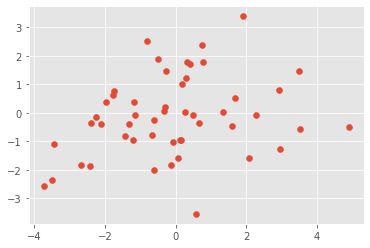

In [3]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3, 1], [1, 2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Путём диагонализации истинной матрицы ковариаций $C$, мы можем найти преобразование исходного набора данных, компоненты которого наилучшим образом будут описывать дисперсию, с учётом их ортогональности друг другу:

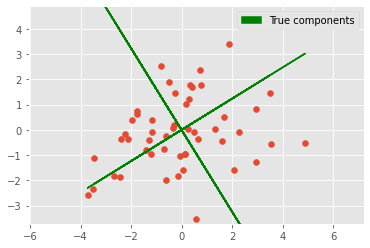

In [4]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:, 0], data[:, 1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:, 0], (W_true[0, 0] / W_true[0, 1]) * data[:, 0], color="g")
plt.plot(data[:, 0], (W_true[1, 0] / W_true[1, 1]) * data[:, 0], color="g")
g_patch = mpatches.Patch(color="g", label="True components")
plt.legend(handles=[g_patch])
plt.axis("equal")
limits = [
    np.minimum(np.amin(data[:, 0]), np.amin(data[:, 1])),
    np.maximum(np.amax(data[:, 0]), np.amax(data[:, 1])),
]
plt.xlim(limits[0], limits[1])
plt.ylim(limits[0], limits[1])
plt.draw()


А теперь сравним эти направления с направлениями, которые выбирает метод главных компонент:

In [5]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:, 0], data[:, 1])
    plt.plot(data[:, 0], -(W_pca[0, 0] / W_pca[0, 1]) * data[:, 0], color="c")
    plt.plot(data[:, 0], -(W_pca[1, 0] / W_pca[1, 1]) * data[:, 0], color="c")
    if legend:
        c_patch = mpatches.Patch(color="c", label="Principal components")
        plt.legend(handles=[c_patch], loc="lower right")
    # сделаем графики красивыми:
    plt.axis("equal")
    limits = [
        np.minimum(np.amin(data[:, 0]), np.amin(data[:, 1])) - 0.5,
        np.maximum(np.amax(data[:, 0]), np.amax(data[:, 1])) + 0.5,
    ]
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[0], limits[1])
    plt.draw()


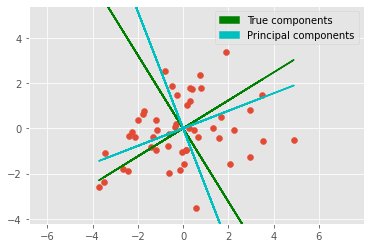

In [6]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:, 0], data[:, 1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:, 0], (W_true[0, 0] / W_true[0, 1]) * data[:, 0], color="g")
plt.plot(data[:, 0], (W_true[1, 0] / W_true[1, 1]) * data[:, 0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color="c", label="Principal components")
plt.legend(handles=[g_patch, c_patch])
plt.draw()


Видно, что уже при небольшом количестве данных они отличаются незначительно.

Увеличим размер выборки:

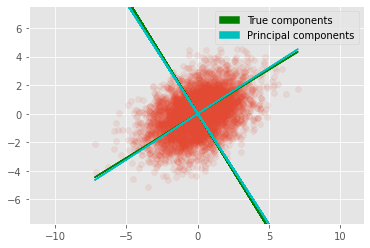

In [7]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:, 0], data_large[:, 1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:, 0], (W_true[0, 0] / W_true[0, 1]) * data_large[:, 0], color="g")
plt.plot(data_large[:, 0], (W_true[1, 0] / W_true[1, 1]) * data_large[:, 0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color="c", label="Principal components")
plt.legend(handles=[g_patch, c_patch])
plt.draw()


В этом случае главные компоненты значительно точнее приближают истинные направления данных, вдоль которых наблюдается наибольшая дисперсия.

## Статистический взгляд на модель

Задача, стоящая за любым методом уменьшения размерности: получить из набора зашумлённых признаков $X$ истинные значения $Y$, которые на самом деле определяют набор данных (т.е. сведение датасета с большим количеством признаков к данным, имеющим т.н. "эффективную размерность").

В случае метода главных компонент мы хотим найти направления, вдоль которых максимальна дисперсия, с учётом описанных выше предположений о структуре данных и компонент.

Давайте попробуем получить метрику качества, которая должна определять, насколько данные хорошо описываются построенной моделью при заданном числе компонент. Отбор признаков при этом сводится к тому, что мы выбираем то количество компонент, при котором используемая метрика (логарифм правдоподобия) является максимальной.

С учётом предположений задача метода главных компонент выглядит следующим образом:

$$ x = Wy + \mu + \epsilon$$

где:
- $x$ -- наблюдаемые данные
- $W$ -- матрица главных компонент (каждый стобец -- одна компонента)
- $y$ -- их проекция на главные компоненты
- $\mu$ -- среднее наблюдаемых данных
- $\epsilon \sim \mathcal{N}(0, \sigma^2I)$ -- нормальный шум

Исходя из распределения шума, выпишем распределение на $x$:

$$p(x \mid y) = \mathcal{N}(Wx + \mu, \sigma^2I) $$

Введём априорное распределение на $y$:

$$p(y) = \mathcal{N}(0, 1)$$

Выведем из этого при помощи формулы Байеса маргинальное распределение на $p(x)$:

$$p(x) = \mathcal{N}(\mu, \sigma^2I + WW^T)$$

Тогда правдоподобие набора данных при условии используемой модели выглядит следующим образом ([ссылка на статью](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.score_samples)):

$$\mathcal{L} = \sum_{i=1}^N \log p(x_i) = -\frac{N}{2} \Big( d\log(2\pi) + \log |C| + \text{tr}(C^{-1}S) \Big)$$

где:
- $C = \sigma^2I + WW^T$ -- матрица ковариации в маргинальной модели
- $S = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)(x_i - \mu)^T$ -- выборочная ковариация

Значение $\mathcal{L}$ имеет смысл логарифма вероятности получения набора данных $X$ при условии, что он удовлетворяет предположениям модели метода главных компонент. Чем оно больше -- тем лучше модель описывает наблюдаемые данные.

## Автоматическое уменьшение размерности данных при помощи логарифма правдоподобия $\mathcal{L}$

Рассмотрим набор данных размерности $D$, чья реальная размерность значительно меньше наблюдаемой (назовём её $d$).

1. Для каждого значения $\hat{d}$ в интервале [1,D] построим модель PCA с $\hat{d}$ главными компонентами.
2. Оценим средний логарифм правдоподобия данных для каждой модели на генеральной совокупности, используя метод кросс-валидации с 3 фолдами (итоговая оценка значения логарифма правдоподобия усредняется по всем фолдам).
3. Найдем модель, для которой он максимален, то есть число компонент в данной модели, т.е. значение $\hat{d}_{opt}$.

Далее данные имеют такие свойства: $Y$ с эффективной размерностью $d$, полученные из независимых равномерных распределений, линейно траснформированны случайной матрицей $W$ в пространство размерностью $D$, после чего ко всем признакам был добавлен независимый нормальный шум с дисперсией $\sigma$.

In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


def plot_scores(d_scores):
    n_components = np.arange(1, d_scores.size + 1)
    plt.plot(n_components, d_scores, "b", label="PCA scores")
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel("n components")
    plt.ylabel("cv scores")
    plt.legend(loc="lower right")
    plt.show()

In [9]:
data = pd.read_csv("data_1.csv")
D = len(data.columns)

In [10]:
d_scores = []
for n in range(1, D + 1):
    model = PCA(n_components=n)
    scores = cross_val_score(model, data)
    d_scores.append(np.mean(scores))
d_scores = np.array(d_scores)

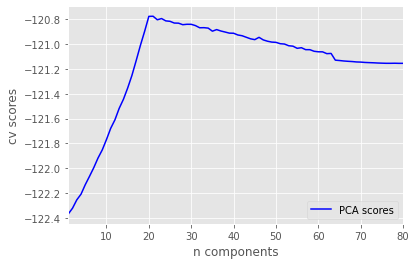

Оптимальная размерность: 21


In [11]:
plot_scores(d_scores)
print(f"Оптимальная размерность: {np.argmax(d_scores) + 1}")

## Вариационный взгляд на модель

Мы знаем, что каждой главной компоненте соответствует описываемая ей дисперсия данных (дисперсия данных при проекции на эту компоненту). Она численно равна значению диагональных элементов матрицы $\Lambda$, получаемой из спектрального разложения матрицы ковариации данных.

Исходя из этого, мы можем отсортировать дисперсию данных вдоль этих компонент по убыванию, и уменьшить размерность данных, отбросив $q$ итоговых главных компонент, имеющих наименьшую дисперсию.

Делать это можно двумя разными способами. Например, если вы вдальнейшем обучаете на данных с уменьшенной размерностью модель классификации или регрессии, то можно запустить итерационный процесс: удалять компоненты с наименьшей дисперсией по одной, пока качество итоговой модели не станет значительно хуже.

Более общий способ отбора признаков заключается в том, что вы можете посмотреть на разности в дисперсиях в отсортированном ряде $\lambda_{(1)} > \lambda_{(2)} > \dots > \lambda_{(D)}$: $\lambda_{(1)}-\lambda_{(2)}, \dots, \lambda_{(D-1)} - \lambda_{(D)}$, и удалить те компоненты, на которых разность будет наибольшей.

Попробуем это сделать.

## Ручное уменьшение размерности признаков посредством анализа дисперсии данных вдоль главных компонент

Рассмотрим ещё один набор данных размерности $D$, чья реальная размерность значительно меньше наблюдаемой (назовём её также $d$).

1. Построим модель PCA с $D$ главными компонентами по этим данным.
2. Спроецируем данные на главные компоненты.
3. Оценим их дисперсию вдоль главных компонент.
4. Отсортируем дисперсии в порядке убывания и получим их попарные разности: $\lambda_{(i-1)} - \lambda_{(i)}$.
5. Найдем разность с наибольшим значением и получим по ней оценку на эффективную размерность данных $\hat{d}$.
6. Построим график дисперсий и убедимся, что полученная оценка на $\hat{d}_{opt}$ действительно имеет смысл.

In [60]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score


def plot_variances(d_variances):
    n_components = np.arange(1, d_variances.size + 1)
    plt.plot(n_components, d_variances, "b", label="Component variances")
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel("n components")
    plt.ylabel("variance")
    plt.legend(loc="upper right")
    plt.show()

In [61]:
data = pd.read_csv("data_1.csv")
D = len(data.columns)

In [62]:
model = PCA(n_components=D)
data_pca = model.fit_transform(data)

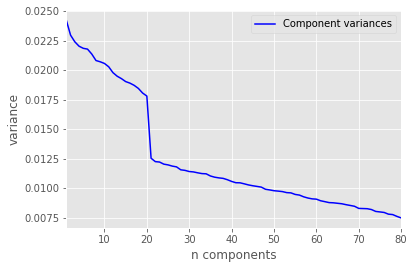

In [63]:
d_variances = model.explained_variance_ratio_
plot_variances(d_variances)

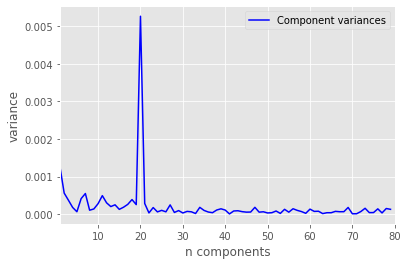

Оптимальная размерность: 20


In [67]:
var_diff = pd.Series(d_variances).sort_values(ascending=False).diff(-1)
plot_variances(var_diff)
print(f"Оптимальная размерность: {np.argmax(var_diff) + 1}")

## Интерпретация главных компонент

В качестве главных компонент мы получаем линейные комбинации исходных призанков, поэтому резонно возникает вопрос об их интерпретации.

Для этого существует несколько подходов, рассмотрим два:
- рассчитать взаимосвязи главных компонент с исходными признаками
- рассчитать вклады каждого конкретного наблюдения в главные компоненты

Первый способ подходит в том случае, когда все объекты из набора данных не несут для нас никакой семантической информации, которая уже не запечатлена в наборе признаков.

Второй способ подходит для случая, когда данные имеют более сложную структуру. Например, лица для человека несут больший семантический смысл, чем вектор значений пикселей, которые анализирует PCA.

Рассмотрим подробнее способ 1: он заключается в подсчёте коэффициентов корреляций между исходными признаками и набором главных компонент.

Так как метод главных компонент является линейным, то для анализа будем использовать корреляцию Пирсона, выборочный аналог которой имеет следующую формулу:

$$r_{jk} = \frac{\sum_{i=1}^N (x_{ij} - \bar{x}_j) (y_{ik} - \bar{y}_k)}{\sqrt{\sum_{i=1}^N (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^N (y_{ik} - \bar{y}_k)^2}} $$

где:
- $\bar{x}_j$ -- среднее значение j-го признака,
- $\bar{y}_k$ -- среднее значение проекции на k-ю главную компоненту.

Корреляция Пирсона является мерой линейной зависимости. Она равна 0 в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы. Исходя из степени корреляции новой компоненты с исходными признаками, можно строить её семантическую интерпретацию, т.к. смысл исходных признаков мы знаем.

## Анализ главных компонент при помощи корреляций с исходными признаками.

1. Обучим метод главных компонент на датасете iris, получим преобразованные данные.
2. Посчитаем корреляции исходных признаков с их проекциями на первые две главные компоненты.
3. Для каждого признака найдем компоненту, с которой он коррелирует больше всего.
4. На основании п.3 сгруппируем признаки по компонентам. Составим два списка: список номеров признаков, которые сильнее коррелируют с первой компонентой, и такой же список для второй.

Набор данных состоит из 4 признаков, посчитанных для 150 ирисов. Каждый из них принадлежит одному из трёх видов.

In [17]:
from sklearn import datasets


def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(
            transformed_data[target == i, 0],
            transformed_data[target == i, 1],
            c=c,
            label=target_name,
        )
    plt.legend()
    plt.show()

In [18]:
# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

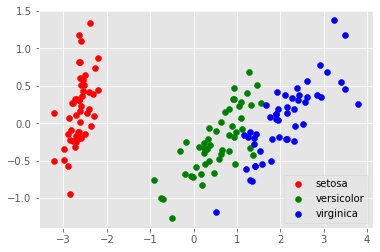

Explained variance ratio by feature: [0.92461872 0.05306648]


In [19]:
model = PCA(n_components=2)
transformed_data = model.fit_transform(data)
plot_iris(transformed_data, target, target_names)
print(f'Explained variance ratio by feature: {model.explained_variance_ratio_}')

In [20]:
df = pd.DataFrame(data)
df_cent = df.subtract(df.mean())
pca_df = pd.DataFrame(model.components_)
pca_df_cent = pca_df - pca_df.mean(axis=1).values.reshape(-1, 1)
pca_df_cent

,0,1,2,3
0,-0.011569,-0.457478,0.483715,-0.014667
1,0.372115,0.445687,-0.457847,-0.359955


In [21]:
from scipy.stats import pearsonr
pearsonr_corr = []
for i in np.arange(data.shape[1]):
    pearsr_1, _ = pearsonr(data[:, i], transformed_data[:, 0])
    pearsr_2, _ = pearsonr(data[:, i], transformed_data[:, 1])
    pearsonr_corr.append([pearsr_1, pearsr_2])
pearsonr_corr = np.array(pearsonr_corr)

In [22]:
for feature, corr in zip(iris.feature_names, pearsonr_corr):
    print(f"Correlation of feature {feature: <17} with PCA {corr[0]: .4f} {corr[1]: .4f}")


Correlation of feature sepal length (cm) with PCA  0.8974  0.3906
Correlation of feature sepal width (cm)  with PCA -0.3987  0.8252
Correlation of feature petal length (cm) with PCA  0.9979 -0.0484
Correlation of feature petal width (cm)  with PCA  0.9665 -0.0488


## Интерпретация главных компонент с использованием данных

Рассмотрим теперь величину, которую можно проинтерпретировать, как квадрат косинуса угла между объектом выборки и главной компонентой:
$$ cos^2_{ik} = \frac{f_{ik}^2}{\sum_{\ell=1}^d f_{i\ell}^2} ; \sum_{k=1}^d cos^2_{ik} = 1 $$
где
- i -- номер объекта
- k -- номер главной компоненты
- $f_{ik}$ -- модуль центрированной проекции объекта на компоненту

Это значит, что для каждого объекта мы в виде данной величины получили веса, пропорциональные вкладу, которую вносит данный объект в дисперсию каждой компоненты. Чем больше вклад, тем более значим объект для описания конкретной главной компоненты.

## Анализ главных компонент при помощи вкладов в их дисперсию отдельных объектов

1. Загрузим датасет лиц Olivetti Faces и обучим на нём модель RandomizedPCA (используется при большом количестве признаков и работает быстрее, чем обычный PCA). Получим проекции признаков на 10 первых главных компонент.
2. Посчитаем для каждого объекта его относительный вклад в дисперсию каждой из 10 компонент, используя квадрат косинуса (d = 10).
3. Для каждой компоненты найдем и визуализируем лицо, которое вносит наибольший относительный вклад в неё.

In [45]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

ol = fetch_olivetti_faces(shuffle=True, random_state=0)
data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)


In [53]:
model = PCA(svd_solver="randomized", n_components=20)
transformed_data_4 = model.fit_transform(data)

In [54]:
def cos_metric(f, i):
    return f[i] ** 2 / np.sum(f ** 2)

In [55]:
cos_matrix = []
for item in transformed_data_4:
    cos_matrix.append([cos_metric(item, k) for k in range(len(item))])

list_pc = np.argmax(cos_matrix, axis=0)
print(list_pc)

[197  18 276 348 363  12 369 382 370 140 342 168 142 177 356  34 244 244
 198 392]


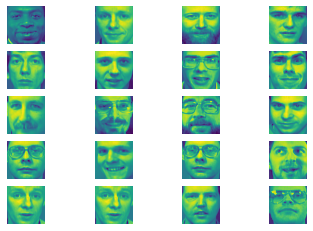

In [56]:
rows = 5
for i, image in enumerate(list_pc):
    plt.subplot(rows, len(list_pc) // rows, i + 1)
    plt.axis('off')
    plt.imshow(ol.images[image].reshape(image_shape))


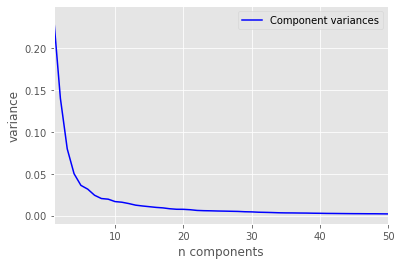

In [50]:
d_variances = model.explained_variance_ratio_
plot_variances(d_variances)

In [27]:
transformed_data_4[197]

array([10.036033  ,  0.07782036, -0.1323633 ,  0.23390962,  0.19858198,
       -1.3536365 , -0.22048841,  1.3427052 , -1.1664033 ,  0.42329627],
      dtype=float32)

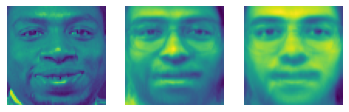

In [59]:
image = 197
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(ol.images[image])

transformed = transformed_data_4[image].copy()
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(model.inverse_transform([transformed]).reshape(image_shape))

plt.subplot(1, 3, 3)
plt.axis('off')
transformed[0] -= 15
plt.imshow(model.inverse_transform([transformed]).reshape(image_shape))

## Анализ основных недостатков метода главных компонент

Рассмотренные выше задачи являются модельными, потому что данные для них были сгенерированы в соответствии с предположениями метода главных компонент. На практике эти предположения, естественно, выполняются далеко не всегда. 

Рассмотрим типичные ошибки PCA, которые следует иметь в виду перед тем, как его применять.

### Направления с максимальной дисперсией в данных неортогональны

Рассмотрим случай выборки, которая сгенерирована из двух вытянутых нормальных распределений:

In [28]:
C1 = np.array([[10, 0], [0, 0.5]])
phi = np.pi / 3
C2 = C1 @ np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])
print(C1)
print(C2)

[[10.   0. ]
 [ 0.   0.5]]
[[ 5.          8.66025404]
 [-0.4330127   0.25      ]]


In [29]:
data = np.vstack(
    [
        np.random.multivariate_normal(mu, C1, size=50),
        np.random.multivariate_normal(mu, C2, size=50),
    ]
)

# обучим модель pca
model = PCA(n_components=2)
model.fit(data)

<ipython-input-29-0eaf27160c8e>:4: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(mu, C2, size=50),


PCA(n_components=2)

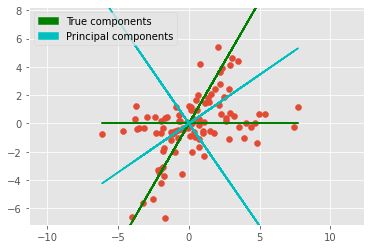

In [30]:
plt.scatter(data[:, 0], data[:, 1])
# построим истинные интересующие нас компоненты
plt.plot(data[:, 0], np.zeros(data[:, 0].size), color="g")
plt.plot(data[:, 0], 3 ** 0.5 * data[:, 0], color="g")

plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color="c", label="Principal components")
plt.legend(handles=[g_patch, c_patch])
plt.draw()

В этом случае PCA работает плохо, так как интересующие нас компоненты в данных коррелированны между собой (или неортогональны). Для поиска подобных преобразований требуются более сложные методы.

Возможно здесь будут лучше работать методы факторного анализа (Factor Analysis).

### Интересное направление в данных не совпадает с направлением максимальной дисперсии

In [31]:
C = np.array([[0.5, 0], [0, 10]])
mu1 = np.array([-2, 0])
mu2 = np.array([2, 0])

data = np.vstack(
    [
        np.random.multivariate_normal(mu1, C, size=50),
        np.random.multivariate_normal(mu2, C, size=50),
    ]
)

# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)

PCA(n_components=2)

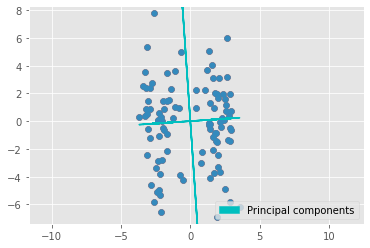

In [32]:
plt.scatter(data[:, 0], data[:, 1])
plot_principal_components(data, model)
plt.draw()

Очевидно, что в данном случае метод главных компонент будет считать вертикальную компоненту более значимой для описания набора данных, чем горизонтальную. 

Но, например, в случае, когда данные из левого и правого кластера относятся к разным классам, для их линейной разделимости вертикальная компонента является шумовой. Несмотря на это, её метод главных компонент никогда шумовой не признает, и есть вероятность, что отбор признаков с его помощью выкинет из ваших данных значимые для решаемой вами задачи компоненты просто потому, что вдоль них значения имеют низкую дисперсию.

Справляться с такими ситуациями могут некоторые другие методы уменьшения размерности данных, например, метод независимых компонент (Independent Component Analysis, ICA).

![image](https://upload.wikimedia.org/wikipedia/commons/b/bb/SOMsPCA.PNG)

One-dimensional SOM versus principal component analysis (PCA) for data approximation. SOM is a red broken line with squares, 20 nodes. The first principal component is presented by a blue line. Data points are the small grey circles. For PCA, the fraction of variance unexplained in this example is 23.23%, for SOM it is 6.86%.

 ## Интересные ссылки

 1. [Clustergram Paper](https://journals.sagepub.com/doi/10.1177/1536867X0200200405)
 1. [Clustergram docs for Python](https://pypi.org/project/clustergram/)
 1. [EigenGame: PCA as a Nash Equilibrium](https://paperswithcode.com/paper/eigengame-pca-as-a-nash-equilibrium)
 1. [EigenGAN: Layer-Wise Eigen-Learning for GANs](https://paperswithcode.com/paper/eigengan-layer-wise-eigen-learning-for-gans)
 1. [t-SNE](https://habr.com/ru/post/267041/)
 1. [SOM](https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117)
 1. [Difference between PCA VS t-SNE](https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/)
 1. [PCA vs LDA vs T-SNE — Let’s Understand the difference](https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0)
 1. [PCA vs T-SNE on standart datasets](https://www.thekerneltrip.com/statistics/tsne-vs-pca)
 1. [scikit-learn. Decomposing signals in components (matrix factorization problems)](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca)